# The Emotions of New York

#### Joelle McKenzie & Alyssa Miller

### 1. Introduction

We choose to do our project on New York history. It’s a state in the United States. The state of New York contains one of the major cities in the U.S., New York City.  The original project was on the emotions of London, which is a major city within the UK in England. We wondered what the history of New York city shows about its emotions and map. We also wanted to know how it compares in terms of emotions. New York is known for its history of immigration and industrialization, which brought New York, especially New York City, to new urban heights. This industrialization also brought immigrants to the city. 

### 2. Hypothesis

We expect the map to consist mostly of New York City rather than New York, the state. A lot happens in the city, it is the most populous city in New York and the United States. Also for it to include global places where the immigrants may have come from or mentioned in their texts.

### 3. Corpus Description

We ended up with a total of 28 texts; we did, however, sample five of them for the presentation. It was narrowed down by using the subjects section and birth section. Since New York City was founded in 1624, we included author births to be after 1600. People born after 1600 would likely be around in 1624 and after. In the subjects, we included ‘New York’ and ‘history.’ We excluded fiction, short stories, speeches, poetry, travel, art, essays, biographies, and cooking in the subjects. We tried to exclude anything not history related. Due to the short length of poetry, we excluded it from our subjects. We wanted to know the historical development of New York.

In [98]:
import pickle
with open('pg_catalog_clean.pickle', 'rb') as file:

    data = pickle.load(file)
df_new_york_history = data[
    (data.language == 'en') & 
    (data.type == 'Text') &
    (data.subjects.str.contains('new york', case=False,)) &
    ~ (data.subjects.str.contains('fiction|speech*', case=False,)) &
    (data.birth > 1600) &
    ~ (data.subjects.str.contains('poetry|short story|travel|art|essay|biography|cooking', case=False,)) &
    (data.subjects.str.contains('history', case=False,))
] .copy ()


In [100]:
from gutenberg_scraper import fetch_text_data
import pandas as pd

df_new_york_history.sample(10)


,text_id,type,issued,title,language,subjects,locc,bookshelves,second_author,last_name,first_name,birth,death
40816,40890,Text,2012-09-28,Diary of an Enlisted Man,en,"United States -- History -- Civil War, 1861-18...",E456,Browsing: History - American; Browsing: Histor...,<NA>,Van Alstyne,Lawrence,1839,1923
60806,60883,Text,2019-12-08,Sketches in Prison Camps: A Continuation of Sk...,en,"United States -- History -- Civil War, 1861-18...",E456,Browsing: History - American; Browsing: Histor...,<NA>,Nott,Charles C.,1827,1916
34904,34977,Text,2011-01-15,Dutch and English on the Hudson: A Chronicle o...,en,New York (State) -- History -- Colonial period...,E151; F106,Browsing: History - American; Browsing: Histor...,"Jefferys, Charles W. (Charles William), 1869-1...",Goodwin,Maud Wilder,1856,1935
49107,49181,Text,2015-06-09,The Fool: A Play in Four Acts,en,American drama -- 20th century; Clergy -- Dram...,PS,Browsing: Culture/Civilization/Society; Browsi...,<NA>,Pollock,Channing,1880,1946
33683,33756,Text,2010-09-18,"Village Life in America 1852-1872, Including t...",en,"Richards, Caroline Cowles, 1842-1913; Canandai...",F106,US Civil War; Browsing: Culture/Civilization/S...,"Sangster, Margaret Elizabeth Munson, 1838-1912...",Richards,Caroline Cowles,1842,1913
31940,32013,Text,2010-04-16,The Last Campaign of the Twenty-Second Regimen...,en,United States. Army. New York Infantry Regimen...,E456,US Civil War; Browsing: History - American; Br...,<NA>,Wingate,George Wood,1840,1928
68153,68232,Text,2022-06-04,The story of the Thirty-Third N. Y. S. Vols o...,en,"United States -- History -- Civil War, 1861-18...",E456,Browsing: History - American; Browsing: Histor...,<NA>,Judd,David Wright,1838,1888
58404,58480,Text,2018-12-17,"Perry's Saints; Or, The Fighting Parson's Regi...",en,"United States -- History -- Civil War, 1861-18...",E456,Browsing: History - American; Browsing: Histor...,<NA>,Nichols,James Moses,1835,1886
72161,72327,Text,2023-12-05,Colonial days in old New York,en,New York (State) -- History -- Colonial period...,F106,Browsing: Culture/Civilization/Society; Browsi...,<NA>,Earle,Alice Morse,1851,1911
13740,13811,Text,2004-10-20,"Peter Stuyvesant, the Last Dutch Governor of N...",en,New York (State) -- History -- Colonial period...,F106,Browsing: History - American; Browsing: Histor...,<NA>,Abbott,John S. C. (John Stevens Cabot),1805,1877


### 4. Geoparsing Results

Since New York is a prominent place in the United States, many of the search results came up with names of different cities/states in the US. We could make this more specific in the future by probably narrowing it more down to just places within the main region. We could also exclude the texts that include places in the US that are outside of New York. Some of the texts include places that are now New York and New York City that used to have other names, such as New Netherland and New Amsterdam. 

In [81]:
from geoparser import Geoparser
from tqdm.notebook import tqdm
import warnings
df_new_york_history = pd.read_pickle('pg_catalog_clean.pickle')

In [162]:
df_new_york_history.sample(5,random_state = 2)

,text_id,type,issued,title,language,subjects,locc,bookshelves,second_author,last_name,first_name,birth,death
3120,3161,Text,2002-04-01,"Narratives of New Netherland, 1609-1664",en,New York (State) -- History -- Colonial period...,F106,Browsing: History - American; Browsing: Histor...,<NA>,Jameson,J. Franklin (John Franklin),1859,1937
2096,2128,Text,2000-04-01,"Narratives of New Netherland, 1609-1664",en,New York (State) -- History -- Colonial period...,F106,United States; Browsing: History - American; B...,<NA>,Jameson,J. Franklin (John Franklin),1859,1937
35647,35720,Text,2011-03-30,Papers Relating to an Act of the Assembly of t...,en,Iroquois Indians; New York (State) -- History ...,F106,Browsing: History - American; Browsing: Histor...,Great Britain. Board of Trade; Great Britain. ...,Colden,Cadwallader,1688,1776
31940,32013,Text,2010-04-16,The Last Campaign of the Twenty-Second Regimen...,en,United States. Army. New York Infantry Regimen...,E456,US Civil War; Browsing: History - American; Br...,<NA>,Wingate,George Wood,1840,1928
49107,49181,Text,2015-06-09,The Fool: A Play in Four Acts,en,American drama -- 20th century; Clergy -- Dram...,PS,Browsing: Culture/Civilization/Society; Browsi...,<NA>,Pollock,Channing,1880,1946


### 5. Sentiment Analysis Results


Describe the sentiment analysis process. Look at the data and see if there are particular sentiment scores that stand out, either high scores or low scores. (1 paragraph) 

The average sentiment scores of the places that were either negative or positive, however, the scores were all low and close to the neutral. The place with the highest negative score was somewhere in Canada; its score was -0.08 rounding up. The highest positive score was near Richmond, VA for some reason. Anyway, its score was 0.09 round up. The most neutral score was in Olney, England at a score of -0.0008 round up. New York’s score was -0.035 rounding up. Its score is negative, but also close to neutral.

In [23]:
import nltk
import re
df_new_york_history = pd.read_pickle('pg_catalog_clean.pickle')
#export data here
df_new_york_history.sample(5, random_state = 2)

,text_id,type,issued,title,language,subjects,locc,bookshelves,second_author,last_name,first_name,birth,death
3120,3161,Text,2002-04-01,"Narratives of New Netherland, 1609-1664",en,New York (State) -- History -- Colonial period...,F106,Browsing: History - American; Browsing: Histor...,<NA>,Jameson,J. Franklin (John Franklin),1859,1937
2096,2128,Text,2000-04-01,"Narratives of New Netherland, 1609-1664",en,New York (State) -- History -- Colonial period...,F106,United States; Browsing: History - American; B...,<NA>,Jameson,J. Franklin (John Franklin),1859,1937
35647,35720,Text,2011-03-30,Papers Relating to an Act of the Assembly of t...,en,Iroquois Indians; New York (State) -- History ...,F106,Browsing: History - American; Browsing: Histor...,Great Britain. Board of Trade; Great Britain. ...,Colden,Cadwallader,1688,1776
31940,32013,Text,2010-04-16,The Last Campaign of the Twenty-Second Regimen...,en,United States. Army. New York Infantry Regimen...,E456,US Civil War; Browsing: History - American; Br...,<NA>,Wingate,George Wood,1840,1928
49107,49181,Text,2015-06-09,The Fool: A Play in Four Acts,en,American drama -- 20th century; Clergy -- Dram...,PS,Browsing: Culture/Civilization/Society; Browsi...,<NA>,Pollock,Channing,1880,1946


In [43]:
 = 

### 6. Mapping

Describe how you "cleaned up" the map and why. For example, you can explain:
- If you decided to remove any results based on count
- Filtered out particular types of locations
- Modified the map colors
- Modified the map zoom and center
Does your map try to tell a particular story? If so, what is that story?
(1-2 paragraphs)

After mapping our results, we saw a wide range of results. Many authors who wrote texts about New York city were born in New York city. Many authors were also born in other countries/other states within the United States. The majority of authors born in other countries were European, specifically from England, Scotland (both part of the United Kingdom) and France. There was also a coordinate in the North American country, Canada.  Others came from other regions, such as the Caribbean. Ultimately, we excluded the Caribbean from our data due to a low count. 
We can conclude that a lot of texts originated from New York City born authors because New York has existed for 400 years. This proves our hypothesis correct because we thought that texts on New York’s history would be written by New York-born authors, but also by those who immigrated to New York over time. Also, we thought the texts mention other places from authors who moved or immigrated to New York. 


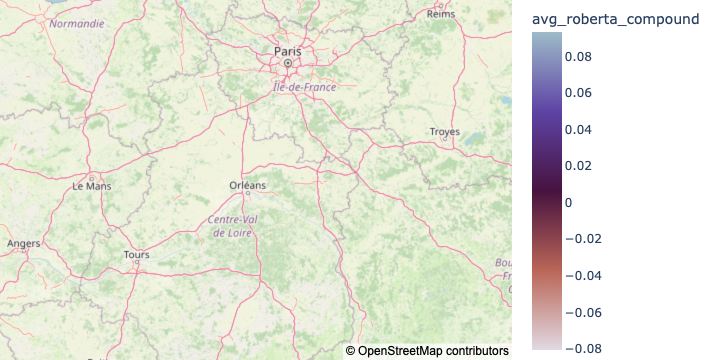

In [70]:
import plotly.express as px
#YOUR MAP CODE HERE


df_new_york_history_sentiment_filtered_SENTIMENTS = pd.read_pickle('df_new_york_history_sentiment_filtered_SENTIMENTS.pickle')

fig = px.scatter_mapbox(
    df_new_york_history_sentiment_filtered_SENTIMENTS,  #put your dataframe here
    lat="latitude",               # Latitude column
    lon="longitude",              # Longitude column
    size="location_count_bucket",        # Bubble size based on location count
    color="avg_roberta_compound",      # Color based on sentiment score
    color_continuous_scale=px.colors.cyclical.Twilight[::-2],  # Use Twilight scale (blue to red)
    size_max=30,                  # Maximum size of the bubbles
    center={"lat": 48, "lon": 2},
    zoom=6                       # Adjust zoom level for better visibility
)

# Update the layout to use the default map style (which doesn't need a token)
fig.update_layout(
    mapbox_style="open-street-map",  # No token needed for this style
    margin={"r":0,"t":0,"l":0,"b":0}  # Remove margins for a cleaner view
)



fig.show()

### 7. Reflection (Individual)

Describe how the process of geoparsing and emotion tagging went. 
- What expectations did you have when you went into the processing and what was the actual result?
- Do you feel that the process was succesful? 
- What were some stumbling blocks you faced when collecting and processing your data?
- What is some "garbage" data that is still in your data set?
- If you had more time, how would you refine the results?

  (1-2 paragraphs)

I expected the project to be frustrating and a bit time-consuming because of the original quick deadline. The actual result was actually fun when we figured out how to do the code and make it work. The process really involved being resourceful and figuring things out. Projects like this require a level resourcefulness and a willingness to figure it out. The strumbling blocks were the code not working and also doing it wrong as first when collecting our data. I would say the "garbage" data is problably there, but it might be hard for me to find. If I had more time, I would refine the result by excluding more results from our inital search query. Also if we had more time, I would have liked to figure out more how the code actually works and the coding language works. This way I could learn more about what I'm actually doing and not go into it partially blind.